<a href="https://colab.research.google.com/github/AbyssGazer-Oliver/Machine-Learning/blob/main/lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, LinearRegression

In [ ]:
url = 'https://itl.nist.gov/div898/strd/nls/data/LINKS/DATA/Hahn1.dat'
df = pd.read_csv(url, skiprows=60, sep=' ',skipinitialspace=True, names=['y0','x0','dummy'])
df.head()

,y0,x0,dummy
0,0.591,24.41,NaN
1,1.547,34.82,NaN
2,2.902,44.09,NaN
3,2.894,45.07,NaN
4,4.703,54.98,NaN


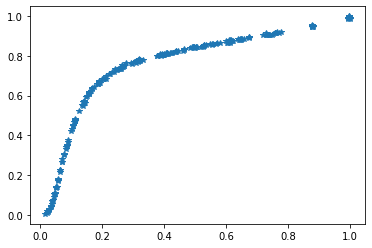

In [ ]:
# TODO 1
x0 = df['x0']
y0 = df['y0']
x = x0/np.max(x0)
y = y0/np.max(y0)
plt.plot(x,y,'*')

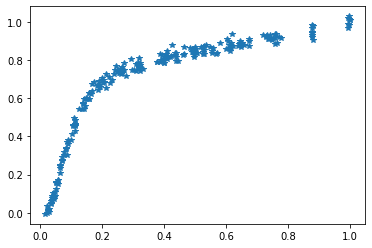

In [ ]:
# TODO 2
yn = y + np.random.normal(0,0.02,len(y0))
plt.plot(x,yn,'*')

In [ ]:
from sklearn.model_selection import train_test_split

# TODO 3
xtr, xts, ytr, yts = train_test_split(x,yn,test_size=0.33)


In [ ]:
def predict(w,x):
    
    # Get the length
    d = (len(w)-1)//2
    
    # TODO 4.  Extract a and b from w
    a = w[:d+1]
    b = w[d+1:]
    
    # TODO 5.  Compute yhat.  You may use the np.polyval function
    # But, remember you must flip the order the a and b
    a_flip=a[::-1]
    b_flip=b[::-1]
    yhat = np.polyval(a_flip,x)/(1+np.polyval(b_flip,x)*x)
    return yhat

In [ ]:
d = 3

# TODO 6.  Create the transformed feature matrix
pw=np.arange(1,d+1)
Za=xtr[:,None]**pw[None,:]
Zb=Za*(-ytr[:,None])
Z = np.hstack((Za,Zb))

# TODO 7.  Fit with parameters with linear regression
regr = LinearRegression()
regr.fit(Z,ytr)

# TODO 8
# Extract the parameters from regr.coef_ and regr.intercept_ and store the parameter vector in winit
winit = np.hstack((regr.intercept_,regr.coef_))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


Text(0, 0.5, 'y')

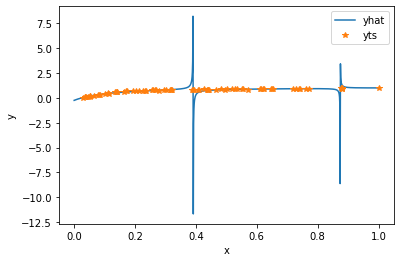

In [ ]:
# TODO 9
xp = np.linspace(0,1,1000)
yhat = predict(winit,xp)
plt.plot(xp,yhat)
plt.plot(xts,yts,'*')
plt.legend(['yhat','yts'])
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

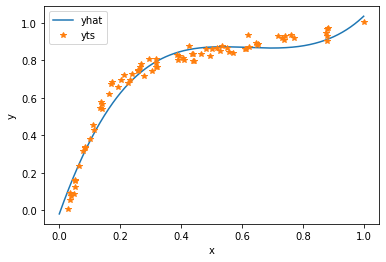

In [ ]:
# TODO 10.  Fit with parameters with linear regression
regr = Ridge(alpha=1e-3)
regr.fit(Z,ytr)

# TODO 11
# Extract the parameters from regr.coef_ and regr.intercept_
winit = np.hstack((regr.intercept_,regr.coef_))

# TODO 12
# Plot the results as above.
xp = np.linspace(0,1,1000)
yhat = predict(winit,xp)
plt.plot(xp,yhat)
plt.plot(xts,yts,'*')
plt.legend(['yhat','yts'])
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
def feval(w,x,y):
        
    
    # TODO 13.  Parse w
    d = (len(w)-1)//2
    
    # Extract a and b from w
    a = w[:d+1]
    b = w[d+1:]
    
    # TODO 14.  Znum[i,j] = x[i]**j
    pw1=np.arange(0,d+1)
    Za=x[:,None]**pw1[None,:]
    # TODO 15.  Zden[i,j] = x[i]**(j+1)
    pw2=np.arange(1,d+1)
    Zb=x[:,None]**pw2[None,:]
    # TODO 16.  Compute yhat 
    # Compute the numerator and denominator
    num=Za.dot(a)
    denom=Zb.dot(b)
    yhat=num/(1+denom)
    # TODO 17.  Compute loss
    f = np.sum((yhat-y)**2)/2
    
    # TODO 18.  Compute gradients
    den1=(yhat-y)/(1+denom)
    J_a=den1.dot(Za)
    num1=(y-yhat)*yhat/(1+denom)
    J_b=num1.dot(Zb)
    fgrad = np.hstack((J_a,J_b))
    
    return f, fgrad

In [ ]:
# TODO 19
w0=winit
w1=w0+np.random.normal(0,1,len(w0))*1e-6
f0,fgrad0=feval(w0,xtr,ytr)
f1,fgrad1=feval(w1,xtr,ytr)
print([f1-f0, fgrad0.dot(w1-w0)])

[2.909415312835062e-07, 2.90820791305462e-07]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  app.launch_new_instance()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  app.launch_new_instance()


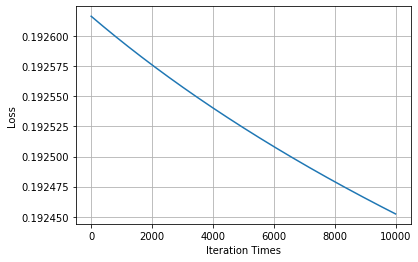

In [ ]:
# TODO 20

nit = 10000
step = 1e-6
fgd = np.empty(nit)
w0=winit
for it in range(nit):
  fgd[it],fgrad=feval(w0,xtr,ytr)
  w0=w0-step*fgrad
plt.plot(np.arange(nit),fgd)
plt.xlabel("Iteration Times")
plt.ylabel("Loss")
plt.grid()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  app.launch_new_instance()


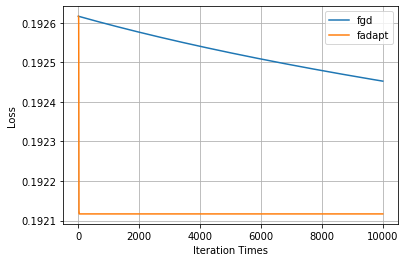

In [ ]:
# TODO 21

nit = 10000
step = 1e-6  # Initial step
fadapt = np.zeros(nit)
w0=winit
f0,fgrad0=feval(w0,xtr,ytr)
for it in range(nit):
  w1=w0-step*fgrad
  f1,fgrad1=feval(w1,xtr,ytr)
  if(f1-f0<0.5*fgrad0.dot(w1-w0))and(f1<f0):
    w0=w1
    f0=f1
    fgrad0=fgrad1
    step=step*2
  else:
    step=step/2
  fadapt[it]=f0

plt.plot(fgd)
plt.plot(fadapt)
plt.xlabel("Iteration Times")
plt.ylabel("Loss")
plt.legend(['fgd','fadapt'])
plt.grid()

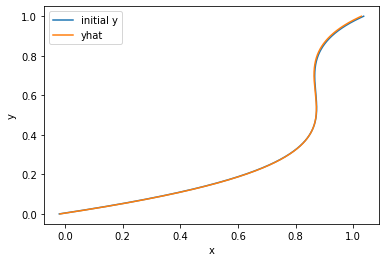

In [ ]:
# TODO 22
xp = np.linspace(0,1,1000)
y=predict(winit,xp)
yhat = predict(w0,xp)
plt.plot(y,xp)
plt.plot(yhat,xp)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(['initial y','yhat'])

In [ ]:
# TODO 23
nit = 1000
step = 1e-3
beta = 0.99
Z=np.zeros(len(winit))
momentum=np.zeros(nit)
w0=winit
for it in range(nit):
  momentum[it],fgrad=feval(w0,xtr,ytr)
  Z=beta*Z+fgrad
  w0=w0-step*Z

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  app.launch_new_instance()


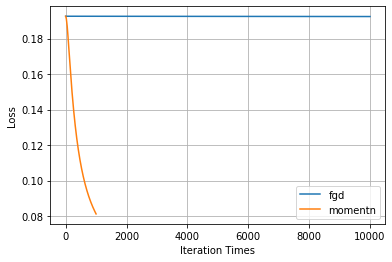

In [ ]:
# TODO 24
# plot yhat vs. x
plt.plot(fgd)
plt.plot(momentum)
plt.xlabel("Iteration Times")
plt.ylabel("Loss")
plt.legend(['fgd','momentn'])
plt.grid()